## **725 Project Code**

## Load raw data

It is publicly available in the UCI Machine learning Repository, which can be retrieved from

 http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

There are a total of more than 40,000 observation each having 16 fields and the final answer is a binary variable of "yes" or "no"

##Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import os
from scipy.stats import zscore

def cleandata(db):
    dataset=db.copy()
    dataset[['balance']].mean()
    dataset['outliers'] = dataset['balance']
    dataset['outliers']= zscore(dataset['outliers'])
    condition = (dataset['outliers']>2.5) | (dataset['outliers']<-2.5 )
    dataset = dataset.drop(dataset[condition].index, axis = 0, inplace = False)
    dataset = dataset.drop('outliers', axis=1)

    dataset.drop('contact', inplace=True, axis=1)

    dataset['duration'] = dataset['duration'].div(60).round(2)

    lst = [dataset]
    for column in lst:
        column.loc[column["month"] == "jan", "month_int"] = 1
        column.loc[column["month"] == "feb", "month_int"] = 2
        column.loc[column["month"] == "mar", "month_int"] = 3
        column.loc[column["month"] == "apr", "month_int"] = 4
        column.loc[column["month"] == "may", "month_int"] = 5
        column.loc[column["month"] == "jun", "month_int"] = 6
        column.loc[column["month"] == "jul", "month_int"] = 7
        column.loc[column["month"] == "aug", "month_int"] = 8
        column.loc[column["month"] == "sep", "month_int"] = 9
        column.loc[column["month"] == "oct", "month_int"] = 10
        column.loc[column["month"] == "nov", "month_int"] = 11
        column.loc[column["month"] == "dec", "month_int"] = 12

    condition = (dataset['duration']<10/60) | (dataset['education'] == 'unknown') | (dataset['job'] == 'unknown') | (dataset['poutcome'] == 'other') | (dataset['age'] >= 65)
    dataset = dataset.drop(dataset[condition].index, axis = 0, inplace = False)
    return dataset

Path = r"bank-full.csv"
dset = pd.read_csv(Path, sep = ';')
data = cleandata(dset)
data


In [ ]:
import seaborn as sns
graph1 = sns.lmplot(x='duration', y='campaign',data = data,hue = 'y',fit_reg = False,)
plt.axis([0,60,0,60])
plt.ylabel('Frequency of Call')
plt.xlabel('Call lenght')
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.show()

In [ ]:
sns.countplot(x='y', data=data)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.boxplot(x='balance', data=data)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = data

encoder = LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['default'] = encoder.fit_transform(df['default'])
df['housing'] = encoder.fit_transform(df['housing'])
df['loan'] = encoder.fit_transform(df['loan'])
df['month'] = encoder.fit_transform(df['month'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])
df['y'] = encoder.fit_transform(df['y'])

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
correlation = df.corr()
correlation_plot = sns.heatmap(correlation, annot=True)

In [ ]:
# X = df.drop(['y'], axis=1)[['duration','previous']]
X = df.drop(['y'], axis=1)
y = df['y']
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##Balancing Techniques

In [ ]:
def oversampling_minority(X, y):
  from sklearn.utils import resample
  data = pd.concat([X, y], axis = 1)
  positive = data[data.y==1]
  negative = data[data.y==0]
  positive_upsampled = resample(positive, replace=True, n_samples=len(negative), random_state=27)

  upsampled_df = pd.concat([negative,positive_upsampled])

  X = upsampled_df.drop('y', axis=1)
  y = upsampled_df['y']
  return X,y

In [ ]:
def undersampling_majority(X, y):
  from sklearn.utils import resample
  data = pd.concat([X, y], axis = 1)
  positive = data[data.y==1]
  negative = data[data.y==0]
  negative_downsampled = resample(negative, replace=True, n_samples=len(positive), random_state=27)

  downsampled_df = pd.concat([positive,negative_downsampled])

  X = downsampled_df.drop('y', axis=1)
  y = downsampled_df['y']
  return X,y

In [ ]:
def applying_SMOTE(X, y):
  from imblearn.over_sampling import SMOTE

  sm = SMOTE(random_state=27, sampling_strategy=1.0)

  X, y = sm.fit_resample(X, y)
  
  return X,y

In [ ]:
#Apply Over/under sampling Here or SMOTE
#X_train, y_train = oversampling_minority(X_train, y_train)
#X_train, y_train = undersampling_majority(X_train, y_train)
# X_train, y_train = applying_SMOTE(X_train, y_train)

##Scaling the Feature Values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

##Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# no effect of regularization C
#svm = SVC(kernel = 'rbf',class_weight='balanced', probability=True)
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

In [ ]:
def score(test, pred):
  print("Confusion matrix")
  cf = confusion_matrix(test, pred)
  print(cf)

  print("Accuracy")
  print(round(accuracy_score(test, pred),2)*100)

  print("Classification Report")
  print(metrics.classification_report(test, pred))

In [ ]:
probs = svm.predict_proba(X_test)
preds = probs[:,1]

score(y_test, svmpred)

Confusion matrix
[[6899  142]
 [ 624  251]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7041
           1       0.64      0.29      0.40       875

    accuracy                           0.90      7916
   macro avg       0.78      0.63      0.67      7916
weighted avg       0.89      0.90      0.89      7916



In [ ]:
# Code snippet taken from Kaggle Notebook. https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall

def plot_ROC(probs):
  fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, probs)
  roc_aucgbk = metrics.auc(fprgbk, tprgbk)

  plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
  plt.plot([0, 1], [0, 1],'r--')
  plt.title('Receiver Operating Characteristic',fontsize=10)
  plt.ylabel('True Positive Rate',fontsize=20)
  plt.xlabel('False Positive Rate',fontsize=15)
  plt.legend(loc = 'lower right', prop={'size': 16})

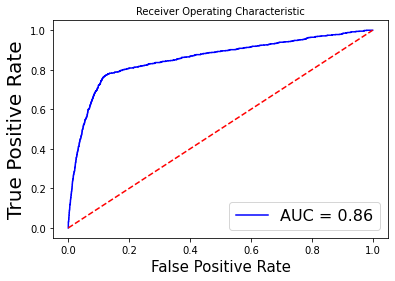

In [ ]:
plot_ROC(preds)

## Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2416 - accuracy: 0.9016
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2186 - accuracy: 0.9077
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2115 - accuracy: 0.9110
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2064 - accuracy: 0.9125
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9141
Epoch 6/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1955 - accuracy: 0.9162
Epoch 7/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1911 - accuracy: 0.9171
Epoch 8/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1888 - accuracy: 0.9188
Epoch 9/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1851 - accuracy: 0.9205
Epoch 10/50
990/990 [==============================] - 2s 2ms/step - loss: 0.1826 - accuracy: 0.9209

In [ ]:
model.evaluate(X_test, y_test)

248/248 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8981


[0.3779907524585724, 0.8980545997619629]

Confusion matrix
[[6690  351]
 [ 456  419]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7041
           1       0.54      0.48      0.51       875

    accuracy                           0.90      7916
   macro avg       0.74      0.71      0.73      7916
weighted avg       0.89      0.90      0.90      7916



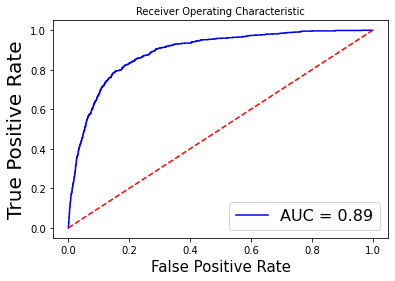

In [ ]:
nn_pred = model.predict(X_test)
#score(y_test, nn_pred)
plot_ROC(nn_pred)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1

score(y_test,nn_pred)

##Decision tree Classifier

Confusion matrix
[[6817  224]
 [ 521  354]]
Accuracy
91.0
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7041
           1       0.61      0.40      0.49       875

    accuracy                           0.91      7916
   macro avg       0.77      0.69      0.72      7916
weighted avg       0.89      0.91      0.90      7916



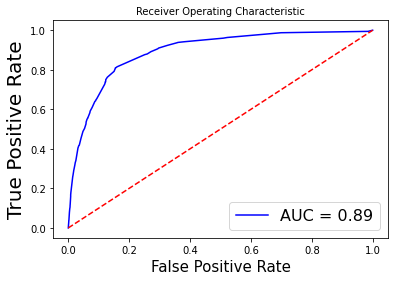

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=7)
    # oversampling_minority  undersampling_majority 
    # newXtrain , newYtrain = applying_SMOTE(X_train,y_train)
    
    # X_train = newXtrain
    # y_train = newYtrain
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # print(confusion_matrix(Y_testingdata, predictions))
    # print(round(accuracy_score(Y_testingdata, predictions),2)*100)
    score(y_test,predictions)
    
    probs = model.predict_proba(X_test)[:,1]
    plot_ROC(probs)
    # plot_confusion_matrix(confusion_matrix(y_test, predictions), X_test, y_test)  
   
    #fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, probs)
    #roc_aucgbk = metrics.auc(fprgbk, tprgbk)

    #plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.title('Receiver Operating Characteristic Deci ',fontsize=10)
    #plt.ylabel('True Positive Rate',fontsize=20)
    #plt.xlabel('False Positive Rate',fontsize=15)
    #plt.legend(loc = 'lower right', prop={'size': 16})


decisionTreeClassifier()

##Logistic Regression

Confusion matrix
[[6910  131]
 [ 694  181]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7041
           1       0.58      0.21      0.30       875

    accuracy                           0.90      7916
   macro avg       0.74      0.59      0.62      7916
weighted avg       0.87      0.90      0.87      7916



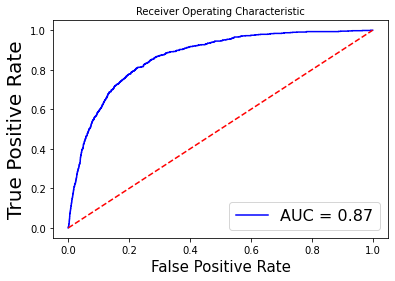

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
score(y_test,logreg_pred)

probs = logreg.predict_proba(X_test)[:,1]
plot_ROC(probs)

##Ablation Study
We divided the set of 16 features into 4 groups:

Group 1: Client Information related features---age, job, marital, education, default

Group 2: Banking related attributes---housing, loan, balance, month_int

Group 3: Related to the last contact made---day, month, duration, campaign, pdays, previous, poutcome

Group 4: Most important 5 features as can be seen from the Feature Importance---duration, balance, day, age

In [ ]:
#Ablation Study
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,month_int
0,58,4,1,2,0,2143,1,0,5,8,4.35,1,-1,0,2,0,5.0
1,44,9,2,1,0,29,1,0,5,8,2.52,1,-1,0,2,0,5.0
2,33,2,1,1,0,2,1,1,5,8,1.27,1,-1,0,2,0,5.0
5,35,4,1,2,0,231,1,0,5,8,2.32,1,-1,0,2,0,5.0
6,28,4,2,2,0,447,1,1,5,8,3.62,1,-1,0,2,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,0,2,1,0,557,0,0,17,9,3.73,1,-1,0,2,1,11.0
45203,23,8,2,2,0,113,0,0,17,9,4.43,1,-1,0,2,1,11.0
45205,25,9,2,1,0,505,0,1,17,9,6.43,2,-1,0,2,1,11.0
45206,51,9,1,2,0,825,0,0,17,9,16.28,3,-1,0,2,1,11.0


##Group 1

In [ ]:
gr1data = data.drop(columns=['balance','housing','loan','day','month','duration','campaign','pdays','previous','poutcome','month_int'])
X = gr1data.drop(['y'], axis=1)
y = gr1data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP1 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(5,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP1 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP1 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP1 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 5) (39579,)
----------GROUP1 Using SVM------------
Confusion matrix
[[7036    0]
 [ 880    0]]
Accuracy
89.0
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7036
           1       0.00      0.00      0.00       880

    accuracy                           0.89      7916
   macro avg       0.44      0.50      0.47      7916
weighted avg       0.79      0.89      0.84      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8917
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3367 - accuracy: 0.8917
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3354 - accuracy: 0.8917
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3345 - accuracy: 0.8917
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3335 - accuracy: 0.8917
Epoch 6/50
990/990 [==============

##Group2

In [ ]:
gr2data = data.drop(columns=['day','month','duration','campaign','pdays','previous','poutcome','age','marital','education','job','default'])
X = gr2data.drop(['y'], axis=1)
y = gr2data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP2 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(4,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP2 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP2 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP2 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 4) (39579,)
----------GROUP2 Using SVM------------
Confusion matrix
[[7064    0]
 [ 852    0]]
Accuracy
89.0
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7064
           1       0.00      0.00      0.00       852

    accuracy                           0.89      7916
   macro avg       0.45      0.50      0.47      7916
weighted avg       0.80      0.89      0.84      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8908
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8908
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3233 - accuracy: 0.8909
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3232 - accuracy: 0.8908
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.3220 - accuracy: 0.8908
Epoch 6/50
990/990 [==============

##Group 3

In [ ]:
gr3data = data.drop(columns=['balance','housing','loan','month_int','age','marital','education','job','default'])
X = gr3data.drop(['y'], axis=1)
y = gr3data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP3 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(7,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP3 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP3 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP3 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 7) (39579,)
----------GROUP3 Using SVM------------
Confusion matrix
[[6931  145]
 [ 575  265]]
Accuracy
91.0
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7076
           1       0.65      0.32      0.42       840

    accuracy                           0.91      7916
   macro avg       0.78      0.65      0.69      7916
weighted avg       0.89      0.91      0.89      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2544 - accuracy: 0.9001
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2370 - accuracy: 0.9060
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2323 - accuracy: 0.9072
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2283 - accuracy: 0.9083
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2260 - accuracy: 0.9090
Epoch 6/50
990/990 [==============

##Group 4

In [ ]:
gr4data = data.drop(columns=['housing','loan','month_int','marital','education','job','default','month','campaign','pdays','previous','poutcome'])
X = gr4data.drop(['y'], axis=1)
y = gr4data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(4,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 4) (39579,)
----------GROUP4 Using SVM------------
Confusion matrix
[[7011   83]
 [ 680  142]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7094
           1       0.63      0.17      0.27       822

    accuracy                           0.90      7916
   macro avg       0.77      0.58      0.61      7916
weighted avg       0.88      0.90      0.88      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2817 - accuracy: 0.8953
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2690 - accuracy: 0.8958
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.8965
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2667 - accuracy: 0.8960
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2656 - accuracy: 0.8965
Epoch 6/50
990/990 [==============

#Group 1, 2

In [ ]:
gr12data = data.drop(columns=['day','month','duration','campaign','pdays','previous','poutcome'])
X = gr12data.drop(['y'], axis=1)
y = gr12data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,2 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(9,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,2 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,2 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,2 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 9) (39579,)
----------GROUP 1,2 Using SVM------------
Confusion matrix
[[7039    0]
 [ 877    0]]
Accuracy
89.0
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7039
           1       0.00      0.00      0.00       877

    accuracy                           0.89      7916
   macro avg       0.44      0.50      0.47      7916
weighted avg       0.79      0.89      0.84      7916

Epoch 1/50
990/990 [==============================] - 4s 3ms/step - loss: 0.3356 - accuracy: 0.8910
Epoch 2/50
990/990 [==============================] - 3s 3ms/step - loss: 0.3234 - accuracy: 0.8915
Epoch 3/50
990/990 [==============================] - 3s 3ms/step - loss: 0.3195 - accuracy: 0.8919
Epoch 4/50
990/990 [==============================] - 3s 3ms/step - loss: 0.3164 - accuracy: 0.8915
Epoch 5/50
990/990 [==============================] - 3s 3ms/step - loss: 0.3151 - accuracy: 0.8921
Epoch 6/50
990/990 [===========

##Group 1, 3

In [ ]:
gr13data = data.drop(columns=['housing','loan','balance','month_int'])
X = gr13data.drop(['y'], axis=1)
y = gr13data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,3 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(12,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,3 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,3 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,3 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 12) (39579,)
----------GROUP 1,3 Using SVM------------
Confusion matrix
[[6894  134]
 [ 635  253]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7028
           1       0.65      0.28      0.40       888

    accuracy                           0.90      7916
   macro avg       0.78      0.63      0.67      7916
weighted avg       0.89      0.90      0.89      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2560 - accuracy: 0.8978
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2328 - accuracy: 0.9066
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2262 - accuracy: 0.9088
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2223 - accuracy: 0.9102
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2201 - accuracy: 0.9113
Epoch 6/50
990/990 [==========

##Group 1, 4

In [ ]:
gr14data = data.drop(columns=['housing','loan','month_int','month','campaign','pdays','previous','poutcome'])
X = gr14data.drop(['y'], axis=1)
y = gr14data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(8,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 8) (39579,)
----------GROUP 1,4 Using SVM------------
Confusion matrix
[[6940   95]
 [ 774  107]]
Accuracy
89.0
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7035
           1       0.53      0.12      0.20       881

    accuracy                           0.89      7916
   macro avg       0.71      0.55      0.57      7916
weighted avg       0.86      0.89      0.86      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2750 - accuracy: 0.8971
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2622 - accuracy: 0.8985
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2588 - accuracy: 0.8986
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2570 - accuracy: 0.8997
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2553 - accuracy: 0.8999
Epoch 6/50
990/990 [===========

##Group 2, 3

In [ ]:
gr23data = data.drop(columns=['age','job','marital','education','default'])
X = gr23data.drop(['y'], axis=1)
y = gr23data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 2,3 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(11,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 2,3 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 2,3 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 2,3 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 11) (39579,)
----------GROUP 2,3 Using SVM------------
Confusion matrix
[[6897  130]
 [ 628  261]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7027
           1       0.67      0.29      0.41       889

    accuracy                           0.90      7916
   macro avg       0.79      0.64      0.68      7916
weighted avg       0.89      0.90      0.89      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2390 - accuracy: 0.9027
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2185 - accuracy: 0.9072
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2108 - accuracy: 0.9095
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9120
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2019 - accuracy: 0.9127
Epoch 6/50
990/990 [==========

##Group 2, 4

In [ ]:
gr24data = data.drop(columns=['job','marital','education','default','month','campaign','pdays','previous','poutcome'])
X = gr24data.drop(['y'], axis=1)
y = gr24data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 2,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(7,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 2,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 2,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 2,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 7) (39579,)
----------GROUP 2,4 Using SVM------------
Confusion matrix
[[6944   94]
 [ 736  142]]
Accuracy
90.0
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7038
           1       0.60      0.16      0.25       878

    accuracy                           0.90      7916
   macro avg       0.75      0.57      0.60      7916
weighted avg       0.87      0.90      0.87      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2625 - accuracy: 0.8948
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2408 - accuracy: 0.9009
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2347 - accuracy: 0.9008
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2294 - accuracy: 0.9038
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2252 - accuracy: 0.9040
Epoch 6/50
990/990 [===========

##Group 3, 4

In [ ]:
gr34data = data.drop(columns=['job','marital','education','default','housing','loan','month_int'])
X = gr34data.drop(['y'], axis=1)
y = gr34data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 3,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(9,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 3,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 3,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 3,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 9) (39579,)
----------GROUP 3,4 Using SVM------------
Confusion matrix
[[6940  132]
 [ 561  283]]
Accuracy
91.0
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7072
           1       0.68      0.34      0.45       844

    accuracy                           0.91      7916
   macro avg       0.80      0.66      0.70      7916
weighted avg       0.90      0.91      0.90      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.8996
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2372 - accuracy: 0.9041
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2323 - accuracy: 0.9050
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2295 - accuracy: 0.9065
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2262 - accuracy: 0.9087
Epoch 6/50
990/990 [===========

##Group 1, 2, 3

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,2,3 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,2,3 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,2,3 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,2,3 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

(39579, 16) (39579,)
----------GROUP 1,2,3 Using SVM------------
Confusion matrix
[[6956  117]
 [ 598  245]]
Accuracy
91.0
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7073
           1       0.68      0.29      0.41       843

    accuracy                           0.91      7916
   macro avg       0.80      0.64      0.68      7916
weighted avg       0.89      0.91      0.89      7916

Epoch 1/50
990/990 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.8971
Epoch 2/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2224 - accuracy: 0.9053
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2157 - accuracy: 0.9069
Epoch 4/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2095 - accuracy: 0.9094
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 0.2040 - accuracy: 0.9110
Epoch 6/50
990/990 [========

##Group 1, 2, 4

In [ ]:
gr124data = data.drop(columns=['month','campaign','pdays','previous','poutcome'])
X = gr124data.drop(['y'], axis=1)
y = gr124data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,2,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(11,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,2,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,2,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,2,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

##Group 1, 3, 4

In [ ]:
gr134data = data.drop(columns=['housing','loan','month_int'])
X = gr134data.drop(['y'], axis=1)
y = gr134data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,3,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(13,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,3,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,3,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,3,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

##Group 2, 3, 4

In [ ]:
gr234data = data.drop(columns=['job','marital','education','default'])
X = gr234data.drop(['y'], axis=1)
y = gr234data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 2,3,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(12,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 2,3,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 2,3,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 2,3,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()

##Group 1, 2, 3, 4

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC

#SVM
svm = SVC(kernel = 'rbf', probability=True)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

probs = svm.predict_proba(X_test)
preds = probs[:,1]
print("----------GROUP 1,2,3,4 Using SVM------------")
score(y_test, svmpred)

#Neural Networks
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)
nn_pred = model.predict(X_test)
nn_pred[nn_pred<=0.5]=0
nn_pred[nn_pred>0.5]=1
print("-----------GROUP 1,2,3,4 Using NN------------")
score(y_test,nn_pred)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predicting the test set results and caculating the accuracy
logreg_pred = logreg.predict(X_test)
print("-----------GROUP 1,2,3,4 Using Logistic Regression------------")
score(y_test,logreg_pred)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier():

    model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("-----------GROUP 1,2,3,4 Using Decision Tree------------")
    score(y_test,predictions)

decisionTreeClassifier()